<a href="https://colab.research.google.com/github/asrafulasf72/Data-Mining-Algorithm/blob/main/question2_Solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("/content/bank_loan_Dataset.csv")
df.head()

,ApplicantID,Age,Gender,MaritalStatus,EducationLevel,EmploymentType,MonthlyIncome,LoanAmount,LoanPurpose,CreditScore,NumOfDependents,Region,TimeWithBank,Defaulted
0,APP000000,43,Female,Single,Postgraduate,Self-Employed,84314.868664,268778.255234,Business,793.659042,2.0,Rural,29,1
1,APP000001,60,Male,Married,Graduate,Salaried,40012.346400,251021.700568,Personal,785.452422,0.0,Semi-urban,28,0
2,APP000002,33,Female,Single,Graduate,Salaried,40461.681730,296409.630480,Car,560.235979,5.0,Semi-urban,18,0
3,APP000003,13,Male,Single,High School,Self-Employed,35525.788721,49448.873636,Education,623.525020,2.0,Rural,17,0
4,APP000004,49,Female,Married,Graduate,Salaried,52219.084951,183379.313023,Business,564.917892,2.0,Urban,13,0


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ApplicantID      99005 non-null   object 
 1   Age              100000 non-null  int64  
 2   Gender           98020 non-null   object 
 3   MaritalStatus    100000 non-null  object 
 4   EducationLevel   94889 non-null   object 
 5   EmploymentType   100000 non-null  object 
 6   MonthlyIncome    95061 non-null   float64
 7   LoanAmount       95061 non-null   float64
 8   LoanPurpose      100000 non-null  object 
 9   CreditScore      100000 non-null  float64
 10  NumOfDependents  99006 non-null   float64
 11  Region           100000 non-null  object 
 12  TimeWithBank     100000 non-null  int64  
 13  Defaulted        100000 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 10.7+ MB


,0
ApplicantID,995
Age,0
Gender,1980
MaritalStatus,0
EducationLevel,5111
EmploymentType,0
MonthlyIncome,4939
LoanAmount,4939
LoanPurpose,0
CreditScore,0


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:

num_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [ ]:
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [ ]:
X = df.drop('Defaulted', axis=1)
y = df['Defaulted']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8297


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[16513   468]
 [ 2938    81]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     16981
         1.0       0.15      0.03      0.05      3019

    accuracy                           0.83     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.74      0.83      0.78     20000



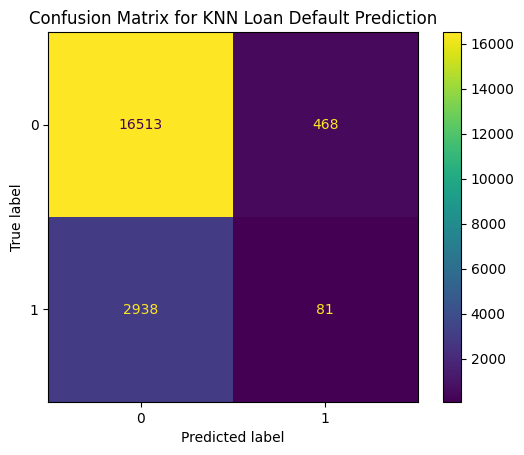

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title("Confusion Matrix for KNN Loan Default Prediction")
plt.show()